In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

## Probability Distributions ##

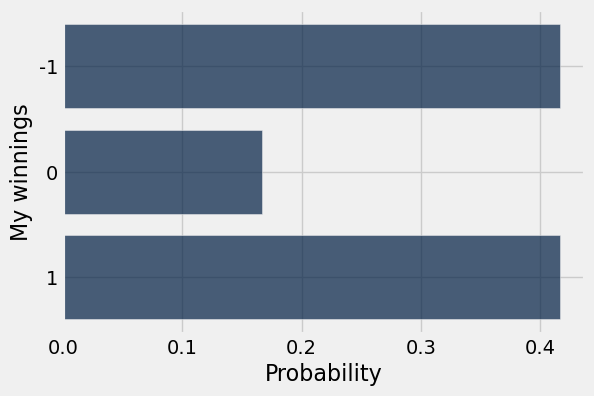

In [2]:
dice_game_prob = Table().with_columns(
    'My winnings', make_array(-1, 0, 1),
    'Probability', make_array(15/36, 6/36, 15/36)
)

dice_game_prob.barh('My winnings')

## Empirical Distributions ##

In [3]:
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

die_faces = np.arange(1, 7)

def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

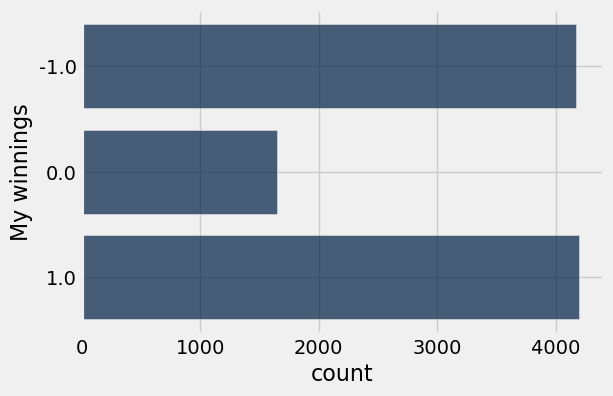

In [4]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
results = Table().with_column('My winnings', game_outcomes)

results.group('My winnings').barh('My winnings')

## Law of Large Numbers ##

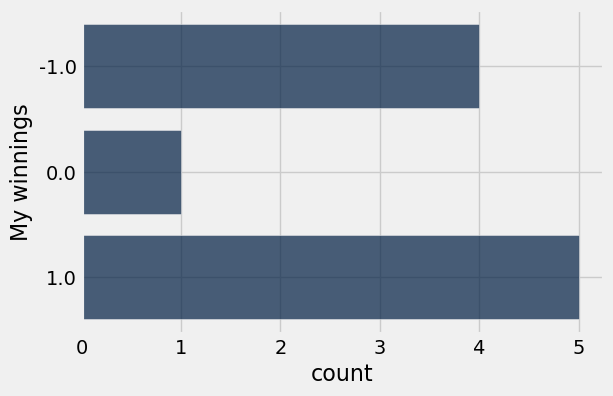

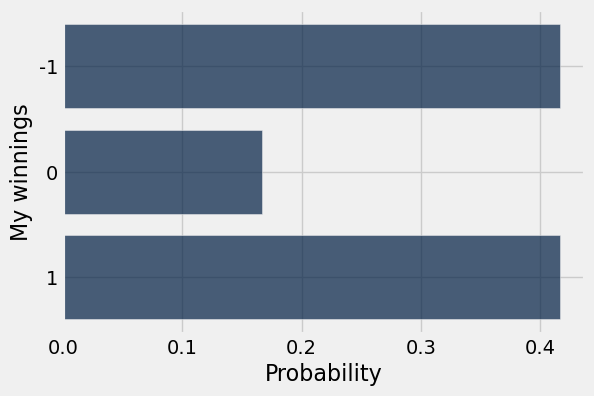

In [5]:
game_outcomes = make_array()

for i in np.arange(10):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
results = Table().with_column('My winnings', game_outcomes)

results.group('My winnings').barh('My winnings')
dice_game_prob.barh('My winnings')

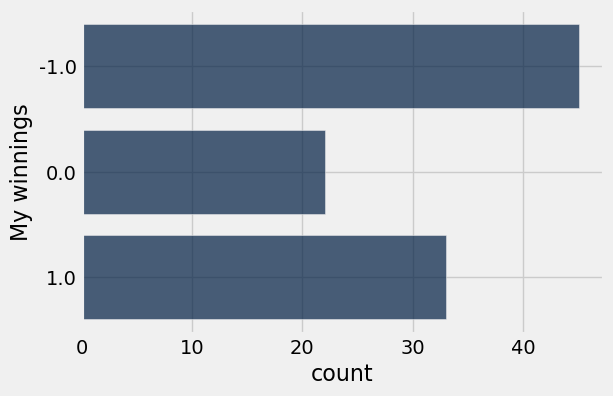

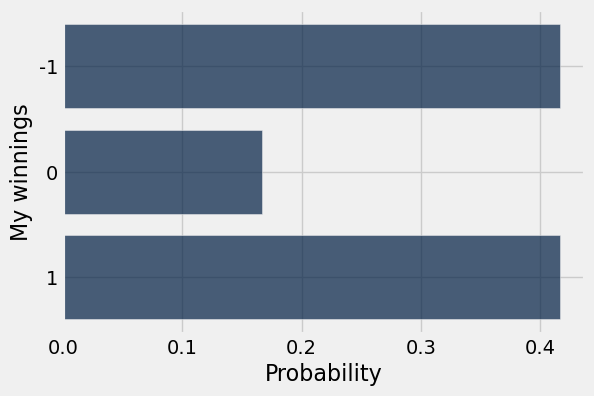

In [6]:
game_outcomes = make_array()

for i in np.arange(100):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
results = Table().with_column('My winnings', game_outcomes)

results.group('My winnings').barh('My winnings')
dice_game_prob.barh('My winnings')

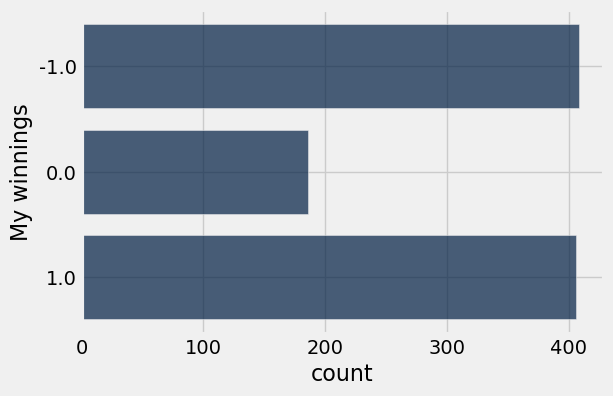

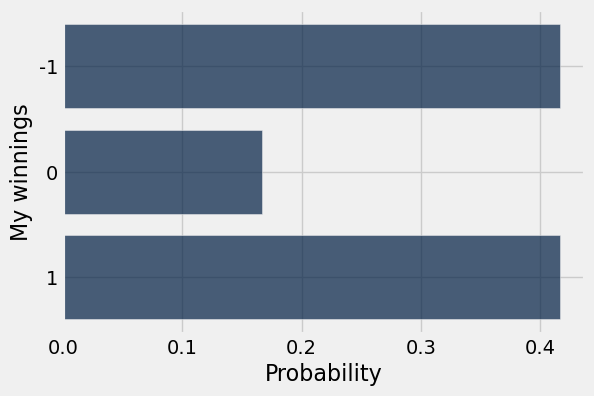

In [7]:
game_outcomes = make_array()

for i in np.arange(1000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
results = Table().with_column('My winnings', game_outcomes)

results.group('My winnings').barh('My winnings')
dice_game_prob.barh('My winnings')

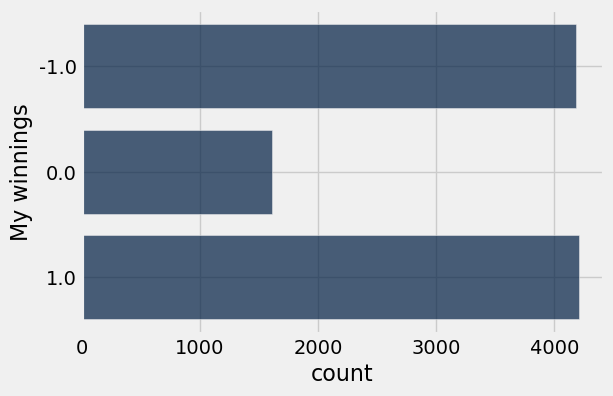

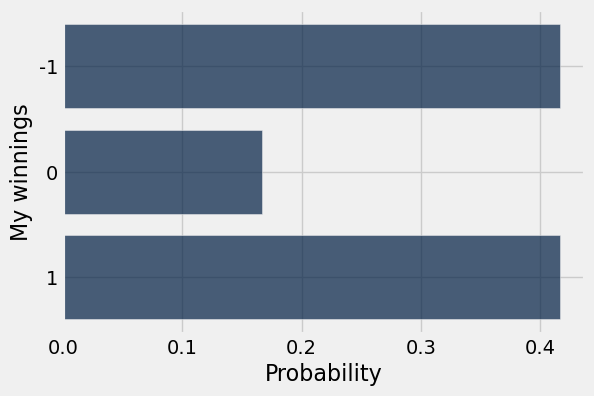

In [8]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
results = Table().with_column('My winnings', game_outcomes)

results.group('My winnings').barh('My winnings')
dice_game_prob.barh('My winnings')

## Random Sampling ##

In [12]:
music = Table.read_table('music.csv')
music = music.with_column('Row', np.arange(music.num_rows)).move_to_start('Row')
music

Row,popularity,dance,duration,energy,tempo,valence,genre
0,0,0.702,890.68,0.563,130.003,0.581,Electronic
1,0,0.534,168,0.994,130.034,0.0295,Electronic
2,0,0.744,360,0.86,129.91,0.458,Electronic
3,0,0.8,418.1,0.826,119.984,0.342,Electronic
4,0,0.541,100.339,0.803,174.069,0.294,Electronic
5,0,0.662,352.206,0.513,120,0.452,Electronic
6,0,0.706,210.027,0.863,120.029,0.258,Electronic
7,0,0.686,186.714,0.471,89.975,0.173,Electronic
8,0,0.701,389.13,0.626,120.006,0.305,Electronic
9,0,0.533,205.714,0.468,125.98,0.11,Electronic


In [13]:
music.where('genre', 'Rap') 

Row,popularity,dance,duration,energy,tempo,valence,genre
1977,17,0.589,181.441,0.721,88.049,0.48,Rap
2796,21,0.635,172.965,0.581,88.051,0.569,Rap
3064,22,0.578,178.36,0.652,130.938,0.457,Rap
3366,23,0.772,269.427,0.484,135.956,0.334,Rap
4116,25,0.791,187.747,0.82,133.264,0.635,Rap
4117,25,0.691,232.72,0.699,130.238,0.374,Rap
4602,26,0.639,228.88,0.865,133.052,0.401,Rap
7883,31,0.514,176.553,0.291,81.733,0.265,Rap
11227,35,0.656,163.977,0.753,129.928,0.391,Rap
13232,37,0.686,171.525,0.67,146.932,0.303,Rap


In [14]:
music.take(make_array(34, 6321, 10040))

Row,popularity,dance,duration,energy,tempo,valence,genre
34,0,0.527,118.333,0.0633,71.974,0.21,Anime
6321,29,0.253,214.8,0.937,144.981,0.46,Anime
10040,34,0.391,135.427,0.56,120.463,0.321,Anime


In [15]:
music.take(np.arange(0, music.num_rows, 1000))

Row,popularity,dance,duration,energy,tempo,valence,genre
0,0,0.702,890.68,0.563,130.003,0.581,Electronic
1000,12,0.592,260.653,0.721,112.005,0.556,Anime
2000,18,0.531,264.187,0.949,119.968,0.345,Anime
3000,22,0.697,127.333,0.474,119.998,0.495,Anime
4000,25,0.344,211.4,0.652,179.011,0.406,Anime
5000,27,0.567,182,0.924,144.956,0.677,Anime
6000,28,0.374,470.2,0.259,144.522,0.229,Classical
7000,30,0.628,228,0.936,105.017,0.953,Anime
8000,31,0.623,216.4,0.535,126.906,0.438,Blues
9000,32,0.292,182.853,0.0214,172.621,0.119,Classical


In [16]:
start = np.random.choice(np.arange(1000))
systematic_sample = music.take(np.arange(start, music.num_rows, 1000))
systematic_sample

Row,popularity,dance,duration,energy,tempo,valence,genre
431,0,0.351,183.24,0.23,140.847,0.112,Classical
1431,14,0.244,326.16,0.0719,98.836,0.0397,Classical
2431,20,0.445,140.867,0.918,118.002,0.23,Anime
3431,23,0.59,208.867,0.944,115.035,0.855,Rock
4431,26,0.0898,144.64,0.674,170.535,0.12,Anime
5431,27,0.153,271.653,0.0703,85.102,0.0479,Classical
6431,29,0.307,350.24,0.606,144.755,0.543,Blues
7431,30,0.577,251.933,0.247,111.924,0.426,Classical
8431,32,0.539,298.72,0.586,90.447,0.672,Electronic
9431,33,0.496,196.827,0.441,84.096,0.386,Jazz


In [33]:
#Example of a probalility sample is a systematic sample

## Large Random Samples ##

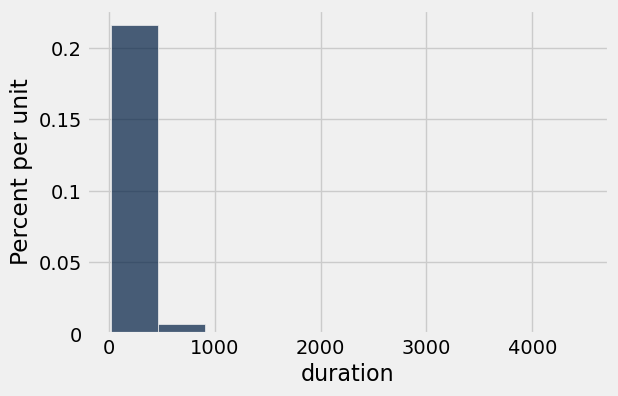

In [17]:
music.hist('duration')

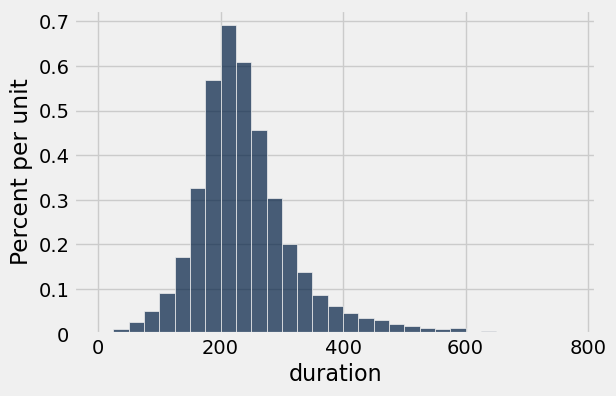

In [18]:
music_bins = np.arange(0, 800, 25)
music.hist('duration', bins=music_bins)

In [19]:
min(music.column('duration'))

15.509

In [20]:
max(music.column('duration'))

4497.9939999999997

In [21]:
np.average(music.column('duration'))

245.48952869822486

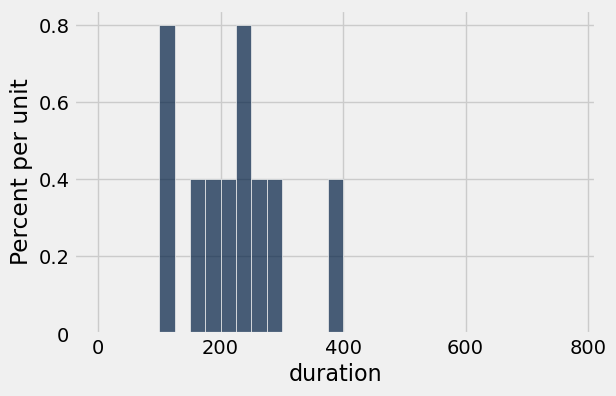

In [22]:
music.sample(10).hist('duration', bins = music_bins)

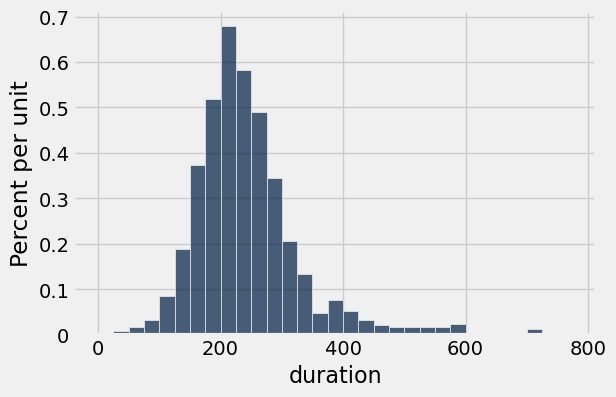

In [23]:
music.sample(1000).hist('duration', bins = music_bins)

## Simulating Statistics ##

In [24]:
np.median(music.column('duration'))

227.53299999999999

In [25]:
np.median(music.sample(10).column('duration'))

237.28649999999999

In [26]:
def sample_median(size):
    return np.median(music.sample(size).column('duration'))

In [27]:
sample_median(10)

205.15550000000002

In [28]:
# Simulate 1000 medians of duration, each sample size = 10

sample_medians_array = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians_array = np.append(sample_medians_array, new_median)

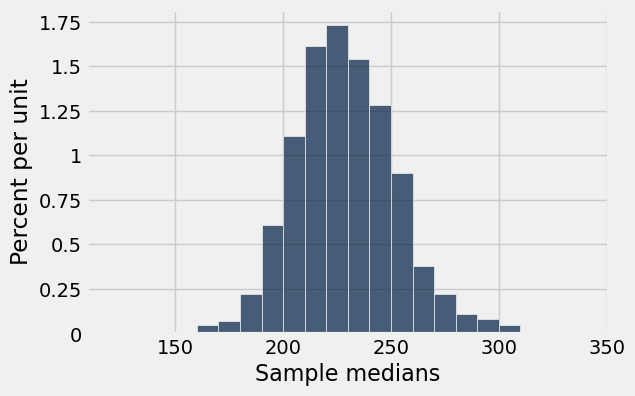

In [29]:
Table().with_column(
    'Sample medians', sample_medians_array
).hist(bins = np.arange(120,350, 10))

In [30]:
sample_medians_array = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians_array = np.append(sample_medians_array, new_median)

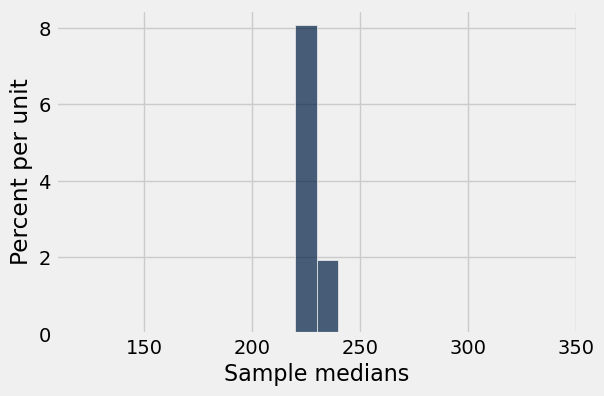

In [31]:
Table().with_column(
    'Sample medians', sample_medians_array
).hist(bins = np.arange(120,350, 10))

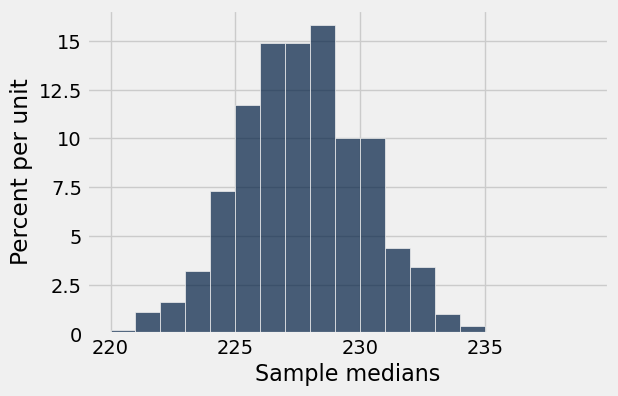

In [32]:
Table().with_column(
    'Sample medians', sample_medians_array
).hist(bins = np.arange(220,240, 1))

In [34]:
#Sampling -> Deterministic or Probabilistic -> Systematic or Simple Random Sample